# Problem Statement

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [3]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Read csv file and convert into Dataframe
data=pd.read_csv(r'D:\DataTrained\avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Observation-

The features in the above data set are-

- Date - The date of the observation

- type - conventional or organic

- year - the year

- Total Volume - Total number of avocados sold

- 4046 - Total number of avocados with PLU 4046 sold

- 4225 - Total number of avocados with PLU 4225 sold

- 4770 - Total number of avocados with PLU 4770 sold
 
The label in the given dataset is-

-Classification-
- Region - the city or region of the observation

-Regression-
- AveragePrice - the average price of a single avocado

The columns to be deleted-
- Unnamed
- Total Bags
- Small Bags
- Large Bags
- XLarge Bags

In [11]:
#Deleting unwanted columns

data=data.drop(columns=['Unnamed: 0', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])

In [12]:
#shape of file
data.shape

(18249, 9)

In [13]:
# Checking for data types of the columns
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
type             object
year              int64
region           object
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [14]:
# Checking for null values
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
dtype: int64

# 
There are no null values

# Visualization of the Data and Encoding object data

In [15]:
data['Date']=pd.to_datetime(data['Date'])

In [16]:
#Storing date and month in separate column
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month

In [17]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico,14,1


In [18]:
#As the date is stored in day and month columns, date is deleted
data=data.drop(columns=["Date"])

<AxesSubplot:ylabel='Frequency'>

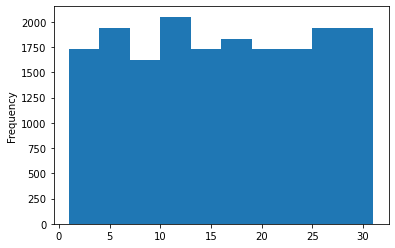

In [19]:
data.Day.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

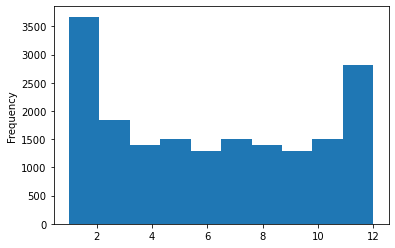

In [20]:
data.Month.plot(kind='hist')

# 
Majority of the data is for January and December

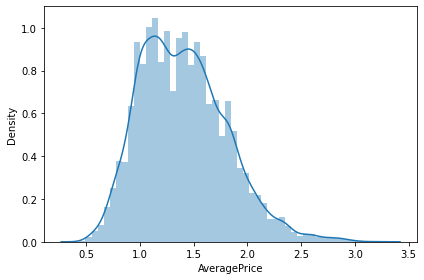

In [21]:
sns.distplot(data["AveragePrice"])
plt.xlabel("AveragePrice",fontsize=10)
plt.tight_layout()

# 
The data seems slightly skewed

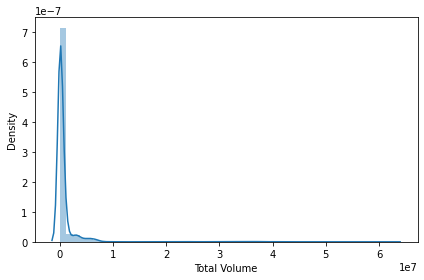

In [24]:
sns.distplot(data["Total Volume"])
plt.xlabel("Total Volume",fontsize=10)
plt.tight_layout()

# 
The data looks highly skewed

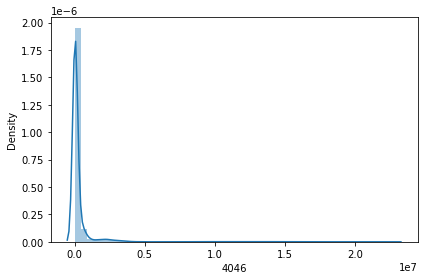

In [25]:
sns.distplot(data["4046"])
plt.xlabel("4046",fontsize=10)
plt.tight_layout()

# 
The data looks highly skewed

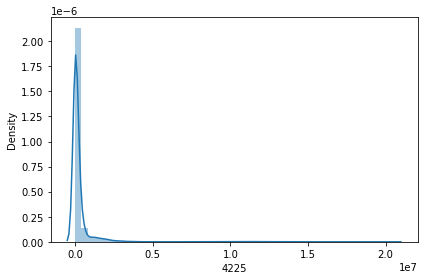

In [26]:
sns.distplot(data["4225"])
plt.xlabel("4225",fontsize=10)
plt.tight_layout()

# 
The data looks highly skewed

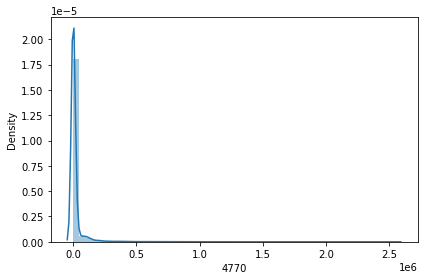

In [27]:
sns.distplot(data["4770"])
plt.xlabel("4770",fontsize=10)
plt.tight_layout()

# 
The data looks highly skewed

conventional    9126
organic         9123
Name: type, dtype: int64


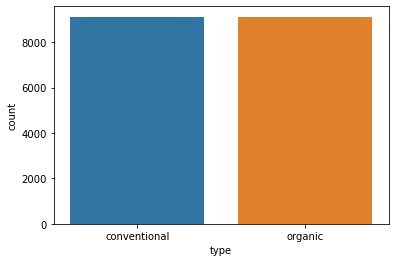

In [28]:
ax=sns.countplot(x="type", data=data)
print(data["type"].value_counts())

# 
9126 avocados are conventional type and 9123 avocados are organic type

In [29]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["type"])
data["type"]=df

# 
The data is encoded as follows-
- 0 - Conventional
- 1 - Organic

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


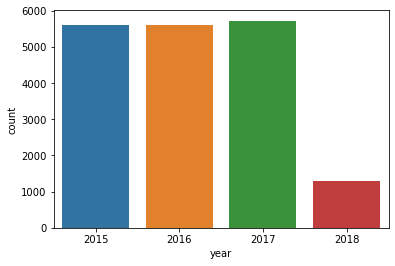

In [30]:
ax=sns.countplot(x="year", data=data)
print(data["year"].value_counts())

# 
5722 data are of 2017, 5616 data are of 2016, 5615 data are of 2015, 1296 data are of 2018

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

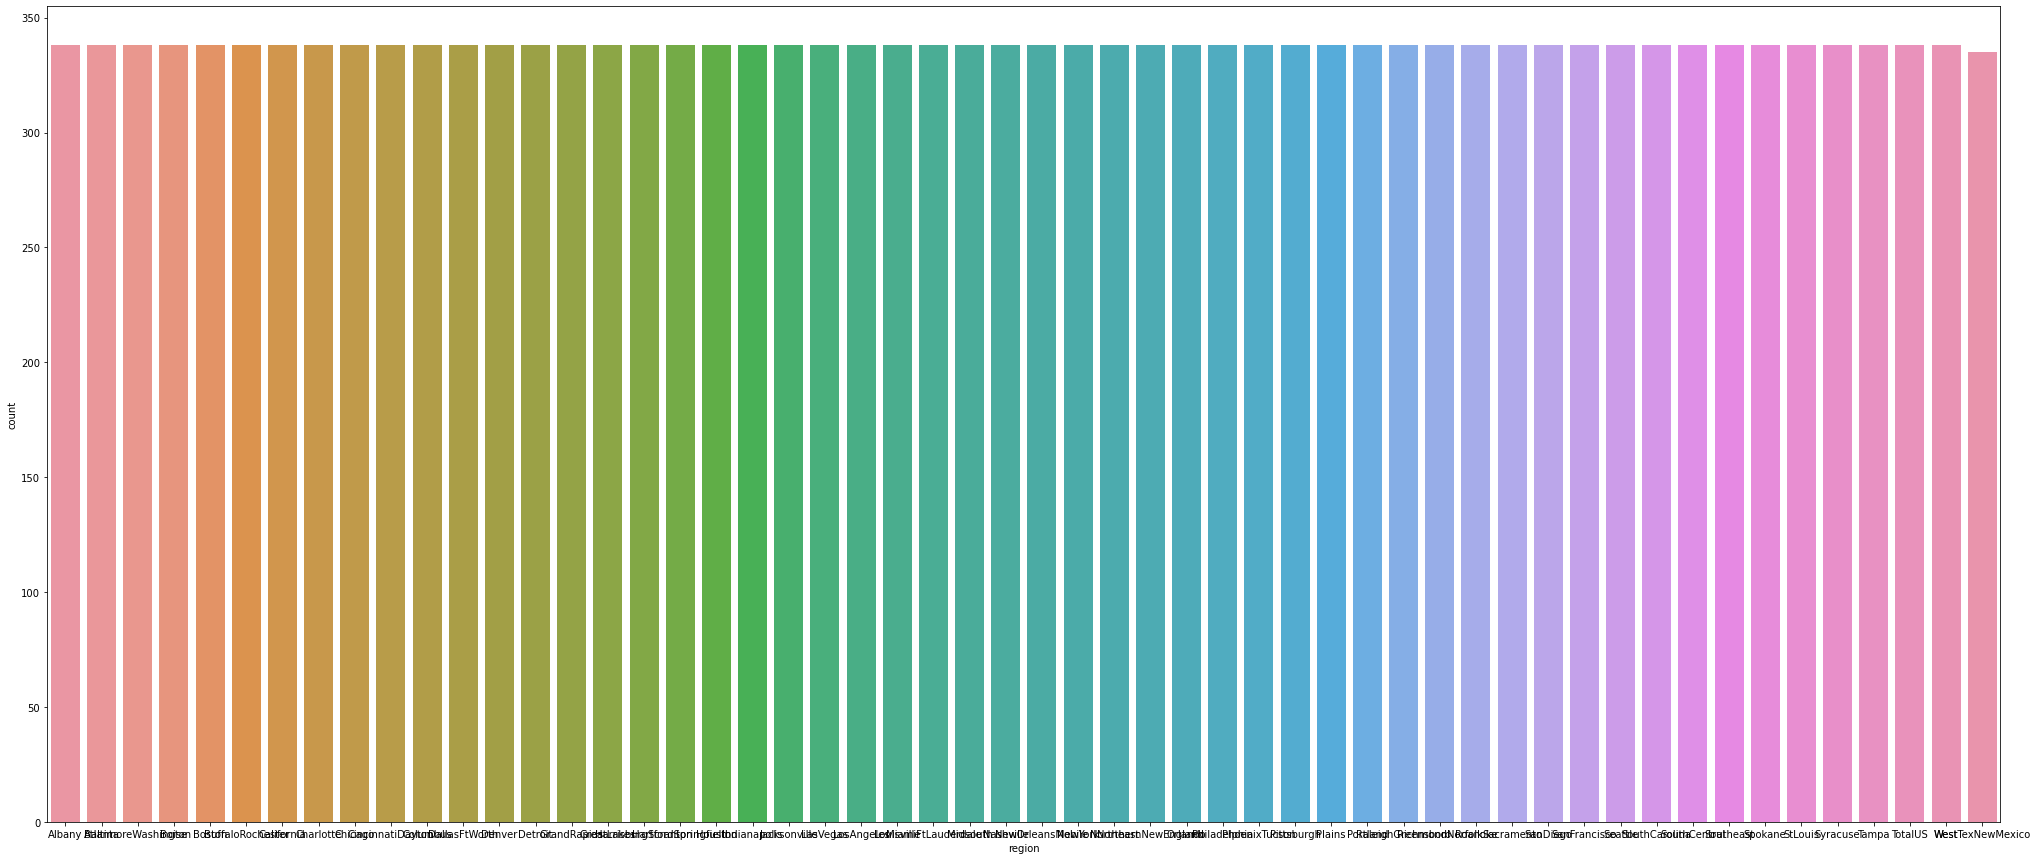

In [33]:
plt.figure(figsize=(35,15))
ax=sns.countplot(x="region", data=data)
print(data["region"].value_counts())

In [34]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["region"])
data["region"]=df

In [35]:
#Statistical Analysis
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Day,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,0.499918,2016.147899,26.495644,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.500014,0.939938,15.583788,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,0.000000,2015.000000,13.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,0.000000,2016.000000,26.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.000000,2017.000000,40.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.000000,2018.000000,53.000000,31.000000,12.000000


# Checking Correlation

In [36]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Day,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.615845,0.093197,-0.011716,0.027386,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,-0.232434,0.017193,0.174176,-0.009747,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,-0.225819,0.003353,0.192073,-0.010159,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.232289,-0.009559,0.145726,-0.012393,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.210027,-0.036531,0.095252,-0.009009,-0.033424
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,1.000000,-0.000032,-0.000280,-0.000013,-0.000085
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,-0.000032,1.000000,-0.000055,0.004475,-0.177050
region,-0.011716,0.174176,0.192073,0.145726,0.095252,-0.000280,-0.000055,1.000000,-0.000021,-0.000144
Day,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.000013,0.004475,-0.000021,1.000000,0.010621
Month,0.162409,-0.024689,-0.025803,-0.022108,-0.033424,-0.000085,-0.177050,-0.000144,0.010621,1.000000


# 
For better understanding let's use a heat map

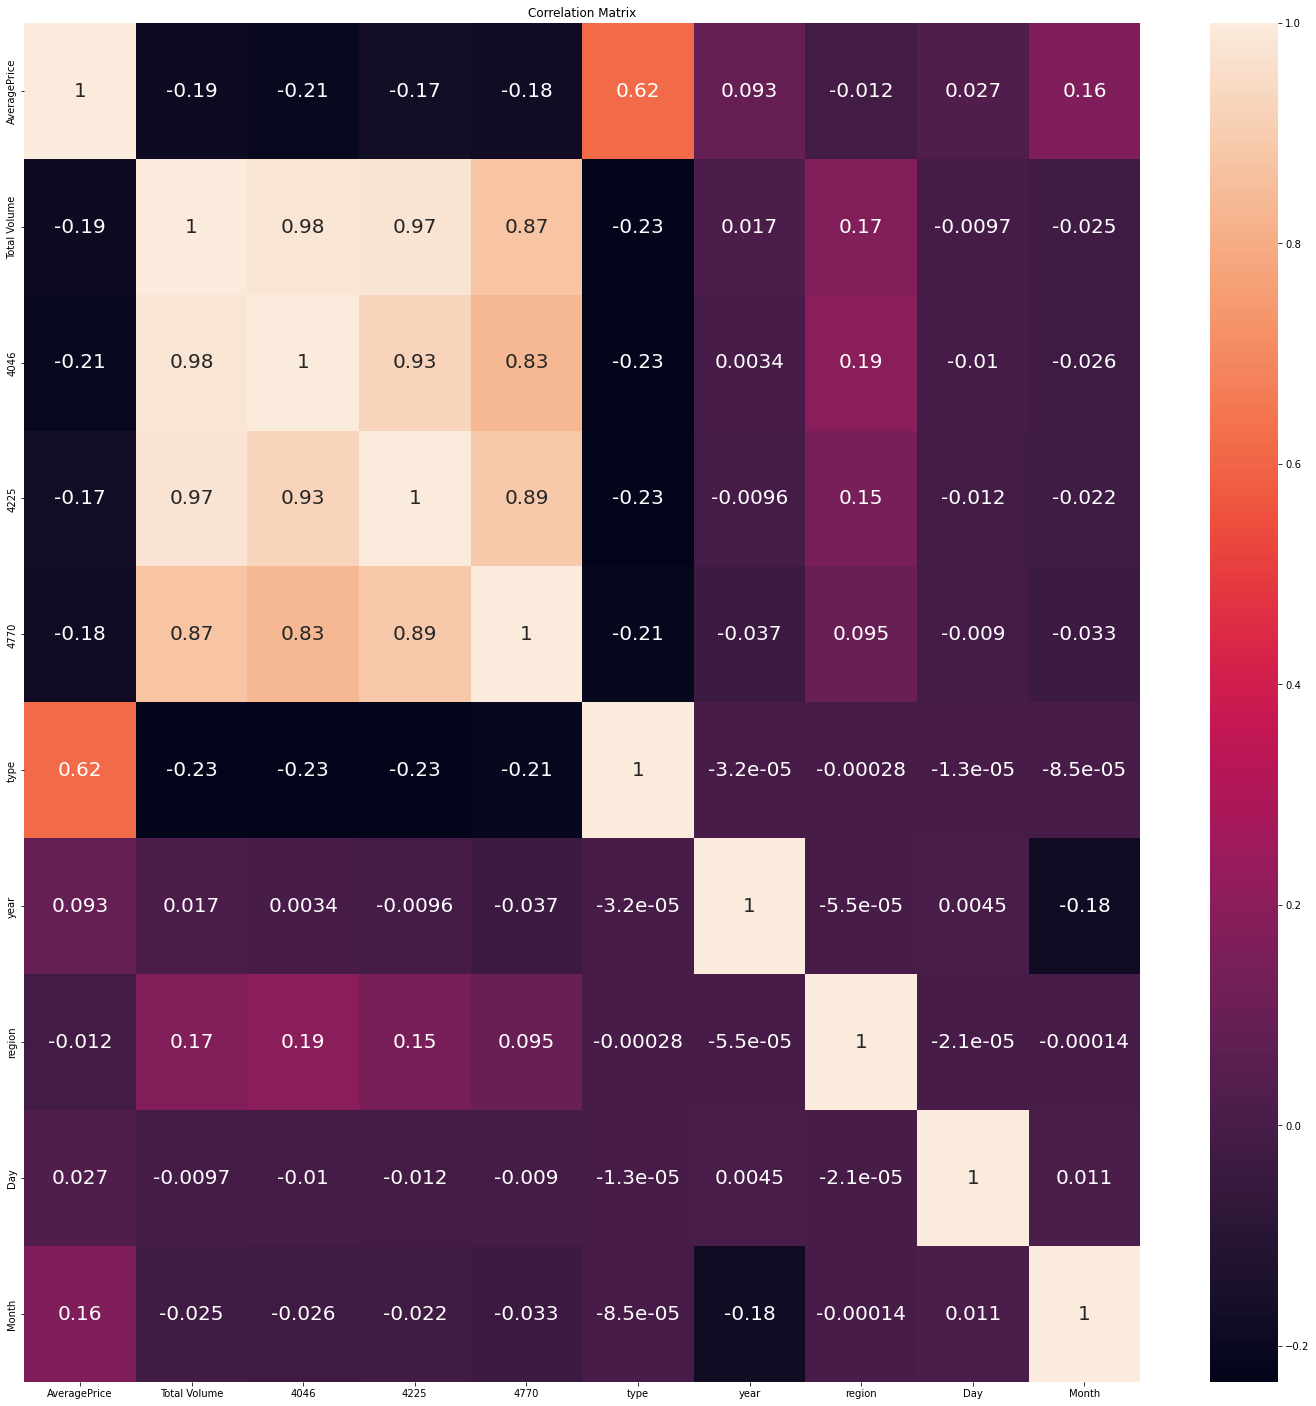

In [38]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[25,25])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':20})
plt.title("Correlation Matrix")
plt.show()

# 
Let's print the correlation values of independent values with target variable for a better understanding

In [40]:
#Let's print the correlation coefficient for the Classification Prediction with Region

corr_matrix=data.corr()
corr_matrix["region"].sort_values(ascending=True)

AveragePrice   -0.011716
type           -0.000280
Month          -0.000144
year           -0.000055
Day            -0.000021
4770            0.095252
4225            0.145726
Total Volume    0.174176
4046            0.192073
region          1.000000
Name: region, dtype: float64

# 
Observation-
- AveragePrice, type, Month, year, and Day are negatively correlated to the label region
- 4770, 4225, Total Volume, and 4046 are positively correlated to the label region
- AveragePrice are 1.1% negatively correlated to the label region showing a extremely weak bond
- Day is 0.002% negatively correlated with region showing a an extremely weak bond
- 4770 is 9% positively correlated with region showing a weak bond
- 4046 is 19% positively correlated with region showing an moderately weak bond

In [41]:
#Let's print the correlation coefficient for the Regression Prediction with Rainfall

corr_matrix=data.corr()
corr_matrix["AveragePrice"].sort_values(ascending=True)

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
4225           -0.172928
region         -0.011716
Day             0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

# Observation-
- 4046, Total Volume, 4770, 4225 , and region are negatively correlated to the label AveragePrice
- Day , year , Month, and type are positively correlated to the label AveragePrice
- 4046 are 20% negatively correlated to the label AveragePrice showing a weak bond
- region is 1.1% negatively correlated with AveragePrice showing a an extremely weak bond
- Day is 2.7% positively correlated with AveragePrice showing a weak bond
- type is 61.5% positively correlated with AveragePrice showing a strong bond

# Checking for outliers

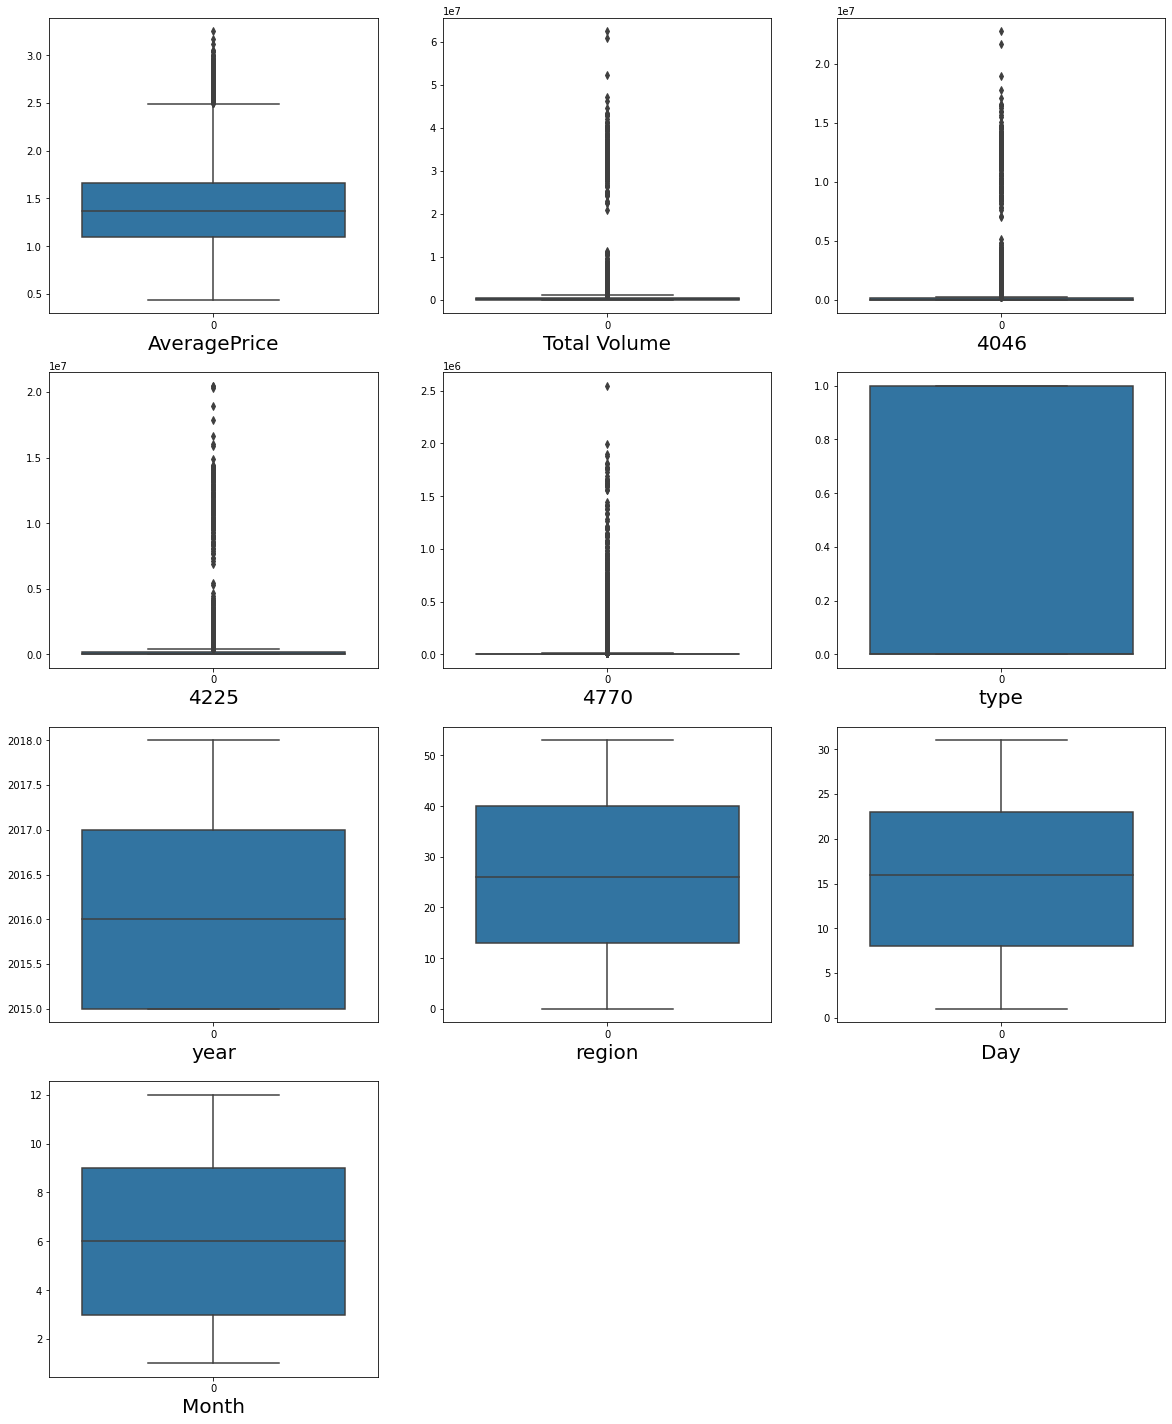

In [42]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if graph<=10:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features containing outliers-

- AveragePrice
- Total Volume
- 4046
- 4225
- 4770

In [44]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(18249, 10)

In [45]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [46]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(18249, 10)
(17838, 10)


# 
Data loss is 2.25% and is tolerable

# Prediction 1- region (As the data is categorical, classification models are used)

# Divide Data Set into features and labels

In [47]:
y_c=data_new['region']
x_c=data_new.drop(columns=['region'])

In [48]:
#Confirming the skewness
x_c.skew().sort_values(ascending=False)

4770            4.759495
4046            4.422120
4225            4.104196
Total Volume    3.661159
AveragePrice    0.385429
year            0.221195
Month           0.111748
Day             0.012527
type           -0.016371
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

- 4770 
- 4046  
- 4225
- Total Volume    

# Transforming Data to remove skewness

In [49]:
from sklearn.preprocessing import power_transform
x_nc=power_transform(x_c)

In [50]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_nc, columns=x_c.columns)
x_skew.skew().sort_values(ascending=False)

year            0.218938
4770            0.021469
AveragePrice    0.001032
Total Volume   -0.004873
type           -0.016371
4046           -0.037293
4225           -0.044029
Month          -0.145247
Day            -0.208499
dtype: float64

# 
Skewness has been removed, let's move forward

# Scaling the data

In [51]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Using Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [53]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y_c, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.41199551569506726 random_state 0
accuracy 0.41199551569506726 random_state 0
accuracy 0.4187219730941704 random_state 1
accuracy 0.4187219730941704 random_state 1
accuracy 0.4131165919282511 random_state 2
accuracy 0.4072309417040359 random_state 3
accuracy 0.4125560538116592 random_state 4
accuracy 0.40274663677130046 random_state 5
accuracy 0.4100336322869955 random_state 6
accuracy 0.40891255605381166 random_state 7
accuracy 0.41451793721973096 random_state 8
accuracy 0.41507847533632286 random_state 9
accuracy 0.4103139013452915 random_state 10
accuracy 0.41227578475336324 random_state 11
accuracy 0.4192825112107623 random_state 12
accuracy 0.4192825112107623 random_state 12
accuracy 0.4111547085201794 random_state 13
accuracy 0.4069506726457399 random_state 14
accuracy 0.41591928251121074 random_state 15
accuracy 0.41227578475336324 random_state 16
accuracy 0.4069506726457399 random_state 17
accuracy 0.40358744394618834 random_state 18
accuracy 0.4044282511210762 random

In [54]:
#creating train-test-sloit using best random state observed(i.e.163)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y_c, test_size=0.2, random_state=163)

In [55]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  43.077354260089685
[[28  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  2]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  1 53  0]
 [ 0  7  0 ...  0  0  9]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.48        59
           1       0.29      0.34      0.31        71
           2       0.36      0.45      0.40        71
           3       0.39      0.41      0.40        74
           4       0.35      0.41      0.38        54
           5       0.57      0.62      0.60        58
           6       0.71      0.71      0.71        79
           7       0.46      0.62      0.53        72
           8       0.46      0.39      0.42        69
           9       0.41      0.61      0.49        64
          10       0.40      0.34      0.37        68
          11       0.52      0.46      0.48        68
          12       0.23      0.27      0.25        55
          13       0.11      0.06      0.08        67
    

# Using KNeighbors Classifier Model

In [56]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
predkn=kn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predkn)*100)      #accuracy score
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy  44.14237668161435
[[32  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  2 30  0]
 [ 0  7  1 ...  0  0 13]]
              precision    recall  f1-score   support

           0       0.29      0.54      0.38        59
           1       0.17      0.35      0.23        71
           2       0.42      0.85      0.56        71
           3       0.48      0.57      0.52        74
           4       0.31      0.52      0.39        54
           5       0.39      0.57      0.46        58
           6       0.67      0.63      0.65        79
           7       0.27      0.50      0.35        72
           8       0.81      0.64      0.72        69
           9       0.38      0.53      0.44        64
          10       0.19      0.32      0.24        68
          11       0.38      0.62      0.47        68
          12       0.43      0.75      0.55        55
          13       0.19      0.16      0.18        67
     

# Using Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  74.60762331838565
[[48  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  4]
 [ 0  0 59 ...  0  0  1]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  4  1 ...  0  0 34]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.74        59
           1       0.52      0.46      0.49        71
           2       0.86      0.83      0.84        71
           3       0.83      0.77      0.80        74
           4       0.75      0.89      0.81        54
           5       0.78      0.79      0.79        58
           6       0.87      0.86      0.87        79
           7       0.76      0.90      0.83        72
           8       0.93      0.93      0.93        69
           9       0.71      0.81      0.76        64
          10       0.68      0.68      0.68        68
          11       0.66      0.68      0.67        68
          12       0.67      0.69      0.68        55
          13       0.67      0.66      0.66        67
     

# Using Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  85.51008968609865
[[50  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 66 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  1 57  0]
 [ 0  1  0 ...  0  0 45]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        59
           1       0.69      0.75      0.72        71
           2       0.93      0.93      0.93        71
           3       0.90      0.84      0.87        74
           4       0.90      0.98      0.94        54
           5       0.87      0.81      0.84        58
           6       0.91      0.94      0.92        79
           7       0.85      0.93      0.89        72
           8       0.97      0.97      0.97        69
           9       0.88      0.91      0.89        64
          10       0.80      0.84      0.82        68
          11       0.79      0.82      0.81        68
          12       0.82      0.93      0.87        55
          13       0.87      0.81      0.84        67
     

# Using AdaBoost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
predada=ada.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predada)*100)      #accuracy score
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy  5.885650224215247
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.02      0.03        59
           1       0.00      0.00      0.00        71
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00        54
           5       0.00      0.00      0.00        58
           6       0.00      0.00      0.00        79
           7       0.00      0.00      0.00        72
           8       0.00      0.00      0.00        69
           9       0.00      0.00      0.00        64
          10       0.00      0.00      0.00        68
          11       0.00      0.00      0.00        68
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        67
          14       0.00      0.00      0.

# Using Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pred=gbdt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_test,gbdt_pred))
print(classification_report(y_test,gbdt_pred))

Accuracy  76.82174887892377
[[46  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 61 ...  0  0  1]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  3  0 ...  0  0 36]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        59
           1       0.53      0.56      0.54        71
           2       0.87      0.86      0.87        71
           3       0.80      0.74      0.77        74
           4       0.81      0.87      0.84        54
           5       0.69      0.76      0.72        58
           6       0.91      0.89      0.90        79
           7       0.78      0.88      0.82        72
           8       0.97      0.94      0.96        69
           9       0.84      0.80      0.82        64
          10       0.65      0.78      0.71        68
          11       0.69      0.75      0.72        68
          12       0.70      0.80      0.75        55
          13       0.69      0.76      0.72        67
     

# Using SVC

In [61]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  66.67600896860986
[[37  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  1]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  1 55  0]
 [ 0  0  1 ...  0  0 29]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        59
           1       0.45      0.42      0.44        71
           2       0.81      0.94      0.87        71
           3       0.73      0.64      0.68        74
           4       0.75      0.85      0.80        54
           5       0.64      0.74      0.69        58
           6       0.93      0.72      0.81        79
           7       0.58      0.78      0.67        72
           8       0.89      0.90      0.89        69
           9       0.62      0.70      0.66        64
          10       0.47      0.51      0.49        68
          11       0.53      0.82      0.65        68
          12       0.59      0.85      0.70        55
          13       0.72      0.51      0.60        67
     

# Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x_c,y_c,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.08699746429967779


In [63]:
scr2=cross_val_score(kn,x_c,y_c,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.3768217410216471


In [64]:
scr3=cross_val_score(dt,x_c,y_c,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.503915548104762


In [65]:
scr4=cross_val_score(rf,x_c,y_c,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.6279202040126168


In [66]:
scr5=cross_val_score(ada,x_c,y_c,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.05056614821212384


In [67]:
scr6=cross_val_score(gbdt,x_c,y_c,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.5659179467741794


In [68]:
scr7=cross_val_score(svc,x_c,y_c,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())

Cross validation score of SVC model:  0.21435238440060295


# 
Random Forest Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [69]:
RandomForestClassifier()

RandomForestClassifier()

In [71]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'criterion':['gini', 'entropy']}

In [72]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train,y_train)       #fitting data in the model
GCV.best_params_               #printing the best parameters found in GridSearchCV

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [73]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [74]:
GCV_pred=GCV.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,GCV_pred) 

0.7242152466367713

# 
Final Accuracy is 72.4% , which depicts that our model is working well

# Saving the Random Forest Classifier Model for Prediction 1- region

In [75]:
filename='Avocado- region.pkl'
pickle.dump(GCV, open(filename,'wb'))

# Prediction 2- AveragePrice (As the data is continuous, regression models are used)

# Divide Data Set into features and labels

In [76]:
y_r=data_new['AveragePrice']
x_r=data_new.drop(columns=['AveragePrice'])

In [77]:
#Confirming the skewness
x_r.skew().sort_values(ascending=False)

4770            4.759495
4046            4.422120
4225            4.104196
Total Volume    3.661159
year            0.221195
Month           0.111748
Day             0.012527
region          0.012062
type           -0.016371
dtype: float64

# Transforming Data to remove skewness

In [78]:
from sklearn.preprocessing import power_transform
x_nr=power_transform(x_r)

In [79]:
#Checking if skewness was rectified
x_skew_r=pd.DataFrame(x_nr, columns=x_r.columns)
x_skew_r.skew().sort_values(ascending=False)

year            0.218938
4770            0.021469
Total Volume   -0.004873
type           -0.016371
4046           -0.037293
4225           -0.044029
Month          -0.145247
Day            -0.208499
region         -0.258077
dtype: float64

# Scaling the data

In [80]:
scaler=StandardScaler()
X_scaled_r=scaler.fit_transform(x_skew_r)

# Using Linear Regression Model

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

#Finding Best random state
for i in range(0,100):
    features_train, features_test, target_train, target_test= train_test_split(X_scaled_r, y_r, test_size=0.2, random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print("At random state ",i, "the training accuracy is:- ",r2_score(target_train,pred_train))
    print("At random state ",i, "the testing accuracy is:- ",r2_score(target_test,pred_test))
    print("\n")

At random state  0 the training accuracy is:-  0.520671141894802
At random state  0 the testing accuracy is:-  0.5126714457863919


At random state  1 the training accuracy is:-  0.5200663109801625
At random state  1 the testing accuracy is:-  0.5151502459017135


At random state  2 the training accuracy is:-  0.5189835191730021
At random state  2 the testing accuracy is:-  0.5191890066541867


At random state  3 the training accuracy is:-  0.5176137233670431
At random state  3 the testing accuracy is:-  0.5245396055853542


At random state  4 the training accuracy is:-  0.5203392267247858
At random state  4 the testing accuracy is:-  0.5139948962629262


At random state  5 the training accuracy is:-  0.5229190989246372
At random state  5 the testing accuracy is:-  0.5035194629897901


At random state  6 the training accuracy is:-  0.5183639462318622
At random state  6 the testing accuracy is:-  0.5215948855175468


At random state  7 the training accuracy is:-  0.516723921892495
At ra

In [82]:
#Applying the best random state found(i.e. 56)

features_train, features_test, target_train, target_test= train_test_split(X_scaled_r, y_r, test_size=0.2, random_state=56)
lr.fit(features_train, target_train)
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.5190726403445252


# Cross Validation of the model

In [83]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scaled_r,y_r,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy," and the accuracy score for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2  the cv score is  -5.355763668074534  and accuracy score for the training is  -0.5245516273268993  and the accuracy score for the testing is  0.5190726403445252


At cross fold  3  the cv score is  0.21662481156996316  and accuracy score for the training is  -0.5245516273268993  and the accuracy score for the testing is  0.5190726403445252


At cross fold  4  the cv score is  0.12555767872911183  and accuracy score for the training is  -0.5245516273268993  and the accuracy score for the testing is  0.5190726403445252


At cross fold  5  the cv score is  0.19910146199342804  and accuracy score for the training is  -0.5245516273268993  and the accuracy score for the testing is  0.5190726403445252


At cross fold  6  the cv score is  0.12123875719506005  and accuracy score for the training is  -0.5245516273268993  and the accuracy score for the testing is  0.5190726403445252


At cross fold  7  the cv score is  0.1427061216409963  and accuracy score for the training is  -

# 
Since the number of folds don't have such impact on the accuracy and cv score. So cv=4 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

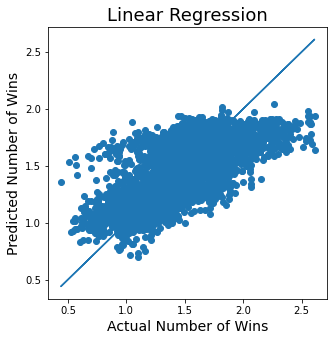

In [84]:
plt.figure(figsize=(5,5))
plt.scatter(x=target_test, y=pred_test)
plt.plot(target_test, target_test)
plt.xlabel('Actual Number of Wins', fontsize=14)
plt.ylabel('Predicted Number of Wins', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# 
The best fit line passes through most of the points

# Regularization

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [86]:
ls=Lasso(alpha=0.0001, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.5189763960964533

In [87]:
cv_score=cross_val_score(ls,X_scaled_r,y_r,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.1253956953066012

# Using Random Forest Regressor Model

In [88]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [89]:
rf=RandomForestRegressor(criterion="mse", max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,X_scaled_r,y_r,cv=4)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  89.05883385924446
Cross Val Score: 13.638341074099353


# Using Ada Boost Regressor Model

In [90]:
from sklearn.ensemble import AdaBoostRegressor
parameters={'n_estimators':np.arange(10,100), 'learning_rate':np.arange(0.01,0.1)}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'learning_rate': 0.01, 'n_estimators': 12}


In [91]:
ad=AdaBoostRegressor(n_estimators=12, learning_rate=0.01)
ad.fit(features_train, target_train)
ad.score(features_train, target_train)
pred_decision=ad.predict(features_test)

ads=r2_score(target_test,pred_decision)
print('R2 Score: ', ads*100)

adscore=cross_val_score(ad,X_scaled_r,y_r,cv=4)
adc=adscore.mean()
print("Cross Val Score:", adc*100)

R2 Score:  46.53639217209625
Cross Val Score: -7.497037071574916


# 
The model accuracy of Random Forest CLassifier is 89% hence it is preferred

# Saving the Random Forest Regressor Model for Prediction 2- AveragePrice

In [92]:
filename='Avocado- AveragePrice.pkl'
pickle.dump(rf, open(filename,'wb'))